In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as pylab
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import tree

%matplotlib inline
pylab.rcParams['figure.figsize'] = (16.0, 7.0)

### Importamos dataset
* Almecenamos dataset como objeto DataFrame de pandas y se configura para que se muetren todas las columnas.
* Se visualizan las primeras 10 columnas del conjunto de datos.
* Se visualizan información de las variables del dataset


In [272]:
data = pd.read_csv('housing_train.csv')
pd.set_option("display.max_rows", 30, "display.max_columns", None)
data.head(10)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   
5   6          50       RL         85.0    14115   Pave   NaN      IR1   
6   7          20       RL         75.0    10084   Pave   NaN      Reg   
7   8          60       RL          NaN    10382   Pave   NaN      IR1   
8   9          50       RM         51.0     6120   Pave   NaN      Reg   
9  10         190       RL         50.0     7420   Pave   NaN      Reg   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   
5         Lvl    AllPub    Inside       Gtl      Mitchel       Norm   
6         Lvl    AllPub    Inside       Gtl      Somerst       Norm   
7         Lvl    AllPub    Corner       Gtl       NWAmes       PosN   
8         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
9         Lvl    AllPub    Corner       Gtl      BrkSide     Artery   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   
5       Norm     1Fam     1.5Fin            5            5       1993   
6       Norm     1Fam     1Story            8            5       2004   
7       Norm     1Fam     2Story            7            6       1973   
8       Norm     1Fam     1.5Fin            7            5       1931   
9     Artery   2fmCon     1.5Unf            5            6       1939   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   
5          1995     Gable  CompShg     VinylSd     VinylSd       None   
6          2005     Gable  CompShg     VinylSd     VinylSd      Stone   
7          1973     Gable  CompShg     HdBoard     HdBoard      Stone   
8          1950     Gable  CompShg     BrkFace     Wd Shng       None   
9          1950     Gable  CompShg     MetalSd     MetalSd       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   
5         0.0        TA        TA       Wood       Gd       TA           No   
6       186.0        Gd        TA      PConc       Ex       TA           Av   
7       240.0        TA        TA     CBlock       Gd       TA           Mn   
8         0.0        TA        TA     BrkTil       TA       TA           No   
9       

In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Discriminar entre variables numericas y categoricas
* Variables numericas: maximo, minimo, media, mediana y cuartiles.
* variables categoricas: listado categorias y frecuencia aparicion

In [274]:
variables_num = list(data._get_numeric_data().columns)
variables_cat = list(set(data.columns) - set(variables_num))

print('Variables númericas:')
print(variables_num)
print('\n')
print('Variables categoricas:')
print(variables_cat)

Variables númericas:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Variables categoricas:
['Fence', 'MasVnrType', 'SaleType', 'Exterior2nd', 'BsmtCond', 'GarageCond', 'ExterCond', 'ExterQual', 'SaleCondition', 'BsmtQual', 'Heating', 'GarageType', 'FireplaceQu', 'RoofStyle', 'BldgType', 'BsmtFinType1', 'RoofMatl', 'Electrical', 'Alley', 'LotShape', 'Condition1', 'KitchenQual', 'Neighborhood', 'Condition2', 'GarageQual', 'BsmtExposure', 'Foundation', 'LotConfig', 'MSZoning', 'PoolQC', 'GarageFinish', 'CentralAir', 'LandC

In [275]:
print('Datos estadíticos de las variables númericas:')
for column in variables_num:
    cuartiles = data[column].quantile([.25, .50, .75])

    print('Variable ' + column + ':')
    print('MAX:', data[column].max())
    print('MIN:', data[column].min())
    print('MEDIA:', data[column].mean())
    print('MEDIANA:', data[column].median())
    print('25%:', cuartiles.iloc[0])
    print('50%:', cuartiles.iloc[1])
    print('75%:', cuartiles.iloc[2])
    print('\n')

Datos estadíticos de las variables númericas:
Variable Id:
MAX: 1460
MIN: 1
MEDIA: 730.5
MEDIANA: 730.5
25%: 365.75
50%: 730.5
75%: 1095.25


Variable MSSubClass:
MAX: 190
MIN: 20
MEDIA: 56.897260273972606
MEDIANA: 50.0
25%: 20.0
50%: 50.0
75%: 70.0


Variable LotFrontage:
MAX: 313.0
MIN: 21.0
MEDIA: 70.04995836802665
MEDIANA: 69.0
25%: 59.0
50%: 69.0
75%: 80.0


Variable LotArea:
MAX: 215245
MIN: 1300
MEDIA: 10516.828082191782
MEDIANA: 9478.5
25%: 7553.5
50%: 9478.5
75%: 11601.5


Variable OverallQual:
MAX: 10
MIN: 1
MEDIA: 6.0993150684931505
MEDIANA: 6.0
25%: 5.0
50%: 6.0
75%: 7.0


Variable OverallCond:
MAX: 9
MIN: 1
MEDIA: 5.575342465753424
MEDIANA: 5.0
25%: 5.0
50%: 5.0
75%: 6.0


Variable YearBuilt:
MAX: 2010
MIN: 1872
MEDIA: 1971.267808219178
MEDIANA: 1973.0
25%: 1954.0
50%: 1973.0
75%: 2000.0


Variable YearRemodAdd:
MAX: 2010
MIN: 1950
MEDIA: 1984.8657534246574
MEDIANA: 1994.0
25%: 1967.0
50%: 1994.0
75%: 2004.0


Variable MasVnrArea:
MAX: 1600.0
MIN: 0.0
MEDIA: 103.6852617079

In [276]:
for column in variables_cat:
    print(f'Variable {column}:')
    print(f'Listado categorias: \n{data[column].unique()}')
    print(f'Frecuencia categorias: \n{data[column].value_counts()}')
    print('\n')

Variable Fence:
Listado categorias: 
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
Frecuencia categorias: 
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


Variable MasVnrType:
Listado categorias: 
['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
Frecuencia categorias: 
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


Variable SaleType:
Listado categorias: 
['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']
Frecuencia categorias: 
WD       1267
New       122
COD        43
ConLD       9
ConLw       5
ConLI       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64


Variable Exterior2nd:
Listado categorias: 
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']
Frecuencia categorias: 
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      

### Matriz de correlación
* Convetir las columnas en categorias.
* Calcular la matriz de correlación
* Visualizar matriz de correlación

In [277]:
data_model = data.copy()
for nombre_columna in data_copy.columns:
    if data_model[nombre_columna].dtype == 'object':
        data_model[nombre_columna] = pd.Categorical(
            data_model[nombre_columna]).codes

Como se observa se ha transformado las variables categoricas en valores númericos para represetar cada categoria.

In [278]:
data_copy.head(5)

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1     -1         3   
1   2          20         3         80.0     9600       1     -1         3   
2   3          60         3         68.0    11250       1     -1         0   
3   4          70         3         60.0     9550       1     -1         0   
4   5          60         3         84.0    14260       1     -1         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            3          0          4          0             5           2   
1            3          0          2          0            24           1   
2            3          0          4          0             5           2   
3            3          0          0          0             6           2   
4            3          0          2          0            15           2   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           2         0           5            7            5       2003   
1           2         0           2            6            8       1976   
2           2         0           5            7            5       2001   
3           2         0           5            7            5       1915   
4           2         0           5            8            5       2000   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0          2003          1         1           12           13           1   
1          1976          1         1            8            8           2   
2          2002          1         1           12           13           1   
3          1970          1         1           13           15           2   
4          2000          1         1           12           13           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          4           2         2         3   
1         0.0          3          4           1         2         3   
2       162.0          2          4           2         2         3   
3         0.0          3          4           0         3         1   
4       350.0          2          4           2         2         3   

   BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0             3             2         706             5           0   
1             1             0         978             5           0   
2             2             2         486             5           0   
3             3             0         216             5           0   
4             0             2         655             5           0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0        150          856        1          0           1           4   
1        284         1262        1          0           1           4   
2        434          920        1          0           1           4   
3        540          756        1          2           1           4   
4        490         1145        1          0           1           4   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2         1             3             1            2             8   
1         2         0             3             1            3             6   
2         2         1             3             1            2             6   
3         1         0             3             1            2 

In [279]:
data.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [280]:
df_matrix_corr = data_model.corr().abs()
df_matrix_corr

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.011156  0.006096     0.010601  0.033226   
MSSubClass     0.011156    1.000000  0.035900     0.386347  0.139781   
MSZoning       0.006096    0.035900  1.000000     0.111690  0.034452   
LotFrontage    0.010601    0.386347  0.111690     1.000000  0.426095   
LotArea        0.033226    0.139781  0.034452     0.426095  1.000000   
...                 ...         ...       ...          ...       ...   
MoSold         0.021172    0.013585  0.031496     0.011200  0.001205   
YrSold         0.000712    0.021407  0.020628     0.007450  0.014261   
SaleType       0.019773    0.012464  0.097437     0.034559  0.012292   
SaleCondition  0.005806    0.024940  0.009494     0.063372  0.034169   
SalePrice      0.021917    0.084284  0.166872     0.351799  0.263843   

                 Street     Alley  LotShape  LandContour  Utilities  \
Id             0.008916  0.000293  0.032122     0.019659   0.013324   
MSSubClass     0.024969  0.179144  0.119289     0.002940   0.022844   
MSZoning       0.087654  0.191736  0.061887     0.017854   0.001192   
LotFrontage    0.040886  0.190957  0.169641     0.080757        NaN   
LotArea        0.197131  0.083668  0.165315     0.149083   0.010123   
...                 ...       ...       ...          ...        ...   
MoSold         0.003690  0.021453  0.033455     0.011599   0.051552   
YrSold         0.025043  0.012036  0.036449     0.020507   0.023353   
SaleType       0.014339  0.007971  0.000911     0.025754   0.126770   
SaleCondition  0.006064  0.037998  0.038118     0.033809   0.089701   
SalePrice      0.041036  0.092607  0.255580     0.015453   0.014314   

               LotConfig  LandSlope  Neighborhood  Condition1  Condition2  \
Id              0.049756   0.005847      0.013735    0.003815    0.001839   
MSSubClass      0.075910   0.025672      0.005985    0.024762    0.042395   
MSZoning        0.009895   0.022055      0.249679    0.027874    0.044606   
LotFrontage     0.208276   0.088345      0.093003    0.009254    0.003722   
LotArea         0.121161   0.436868      0.044569    0.023846    0.022164   
...                  ...        ...           ...         ...         ...   
MoSold          0.018902   0.007072      0.023222    0.009868    0.004049   
YrSold          0.005992   0.002305      0.036697    0.009819    0.021495   
SaleType        0.014325   0.054858      0.036956    0.002338    0.004848   
SaleCondition   0.051579   0.043095      0.021867    0.057747    0.045074   
SalePrice       0.067396   0.051152      0.210851    0.091155    0.007513   

               BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
Id             0.021912    0.018111     0.028365     0.012609   0.012713   
MSSubClass     0.746063    0.397161     0.032628     0.059316   0.027850   
MSZoning       0.005690    0.105315     0.160099     0.186951   0.308908   
LotFrontage    0.448537    0.035502     0.251646     0.059213   0.123349   
LotArea        0.205721    0.033190     0.105806     0.005636   0.014228   
...                 ...         ...          ...          ...        ...   
MoSold         0.025764    0.025728     0.070815     0.003511   0.012398   
YrSold         0.002006    0.018005     0.027347     0.043950   0.013618   
SaleType       0.040306    0.048582     0.060472     0.095267   0.052425   
SaleCondition  0.003530    0.022753     0.193703     0.017758   0.201044   
SalePrice      0.085591    0.180163     0.790982     0.077856   0.522897   

               YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
Id                 0.021998   0.038675  0.022562     0.034694     0.042847   
MSSubClass         0.040581   0.117817  0.031336     0.089159     0.137229   
MSZoning           0.174728   0.000301  0.005133     0.008558     0.006963   
LotFrontage        0.088866   0.169799  0.095785     0.081271     0.107308   
LotArea            0.013788   0.077054  0.149837     0.004256     0.003930 

Con solo representar el tringulo inferior es suficiente, ya que la que son los mismos datos. Para ello, utilizaremos una mascara.

In [281]:
mask = np.triu(np.ones(df_matrix_corr.shape)).astype(np.bool)
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False, False,  True]])

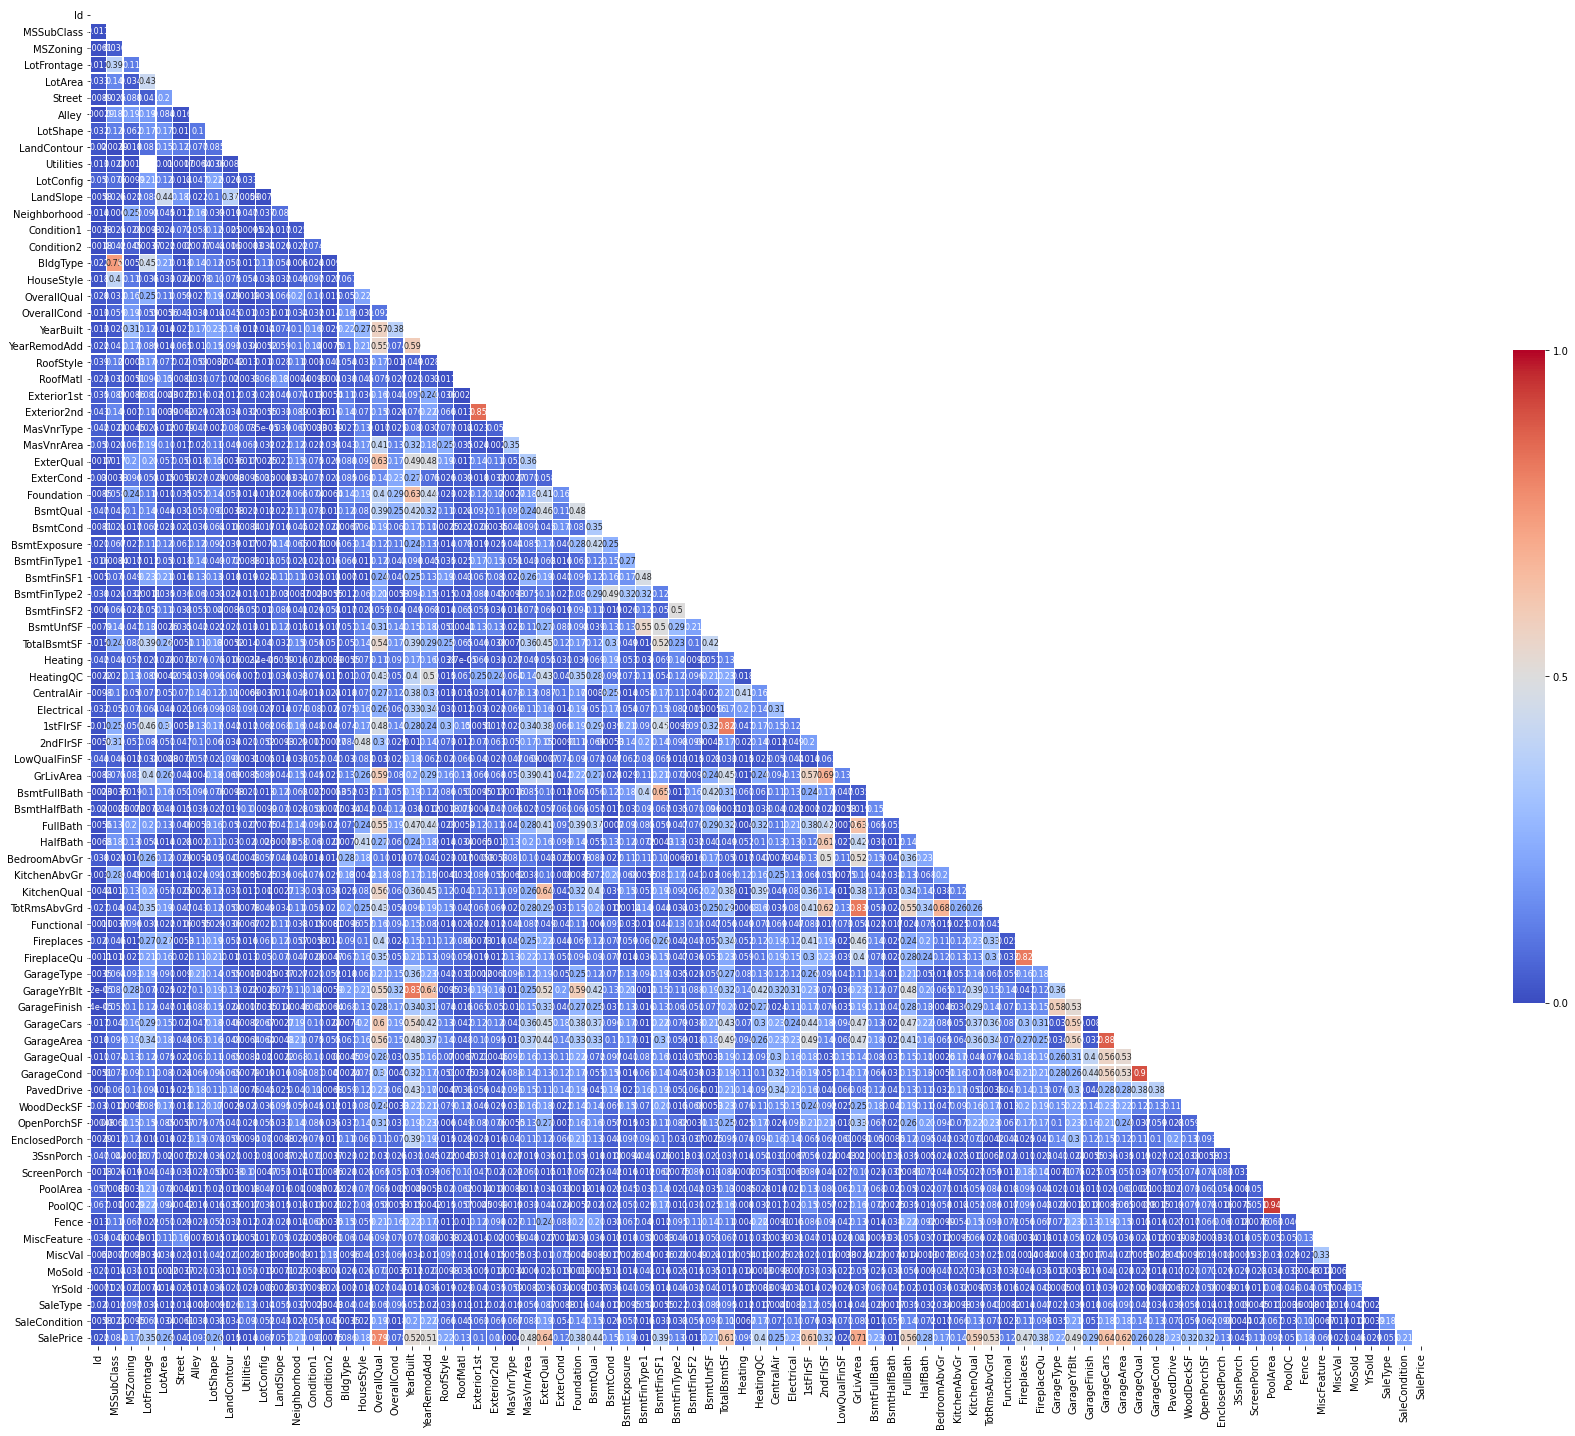

In [282]:
f, ax = plt.subplots(figsize=(30, 30))
ax.set_yticklabels(df_matrix_corr.columns, rotation=0)
ax.set_xticklabels(df_matrix_corr.columns, rotation=45)
heatmap = sns.heatmap(
    df_matrix_corr,
    mask=mask,
    square=True,
    linewidths=.2,
    cmap='coolwarm',
    cbar_kws={'shrink': .4, 'ticks': [-1, -.5, 0, 0.5, 1]},
    vmin=0,
    vmax=1,
    annot=True,
    annot_kws={"size": 8}
)


### Encontrar las correlaciones más altas, que superen 0.75

Comentar analisis entre las variables


In [283]:
corr_stack = df_matrix_corr.where(mask).stack().reset_index()
corr_stack.columns = ['Row','Column','Correlation Value']
corr_75 = corr_unstack[(corr_unstack > 0.75) & (corr_unstack < 1)].sort_values(ascending=False).drop_duplicates(keep='first')
corr_75

PoolArea      PoolQC         0.938402
GarageCond    GarageQual     0.902991
GarageArea    GarageCars     0.882475
Exterior2nd   Exterior1st    0.854163
YearBuilt     GarageYrBlt    0.825667
TotRmsAbvGrd  GrLivArea      0.825489
Fireplaces    FireplaceQu    0.824059
1stFlrSF      TotalBsmtSF    0.819530
SalePrice     OverallQual    0.790982
dtype: float64

### Calcular percentage de nulos de todas las columnas, filtrar por las que superen 0%.

In [284]:
percent_null = (data.isnull().sum()[data.isnull().sum() > 0] / len(data)) * 100
percent_null

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

### Se eliminan las columnas columnas que superen el 10% nulos.

In [285]:
higher_10 = [
    column for column in percent_null.index if percent_null[column] > 10.0]
data_clean = data.drop(columns=higher_10) 
(data_clean.isnull().sum()[data_clean.isnull().sum() > 0] / len(data)) * 100

MasVnrType      0.547945
MasVnrArea      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
Electrical      0.068493
GarageType      5.547945
GarageYrBlt     5.547945
GarageFinish    5.547945
GarageQual      5.547945
GarageCond      5.547945
dtype: float64

### Identificar columnas que no superan el 10% (Añadir que las que tienen valores de 0% no se han añadido)

In [286]:
lower_10 = [
    column for column in percent_null.index if percent_null[column] <= 10.0]
lower_10

['MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

### Analizar las variables de garage y remplazar NaN con la categoria None.
Esto debe significar que estas casas no tienen garaje, por lo tanto se va a reemplazar los valores NaN por una nueva categoría llamada 'None':

In [287]:
garage_columns = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

for garage_column in garage_columns:
    print(garage_column + ':')
    print('Se han encontrado',data_clean[garage_column].isnull().sum(), 'nulos')
    data_clean[garage_column] = data_clean[garage_column].fillna('None')
    print('Se han añadido', data_clean[garage_column].value_counts()['None'], 'None\n')



GarageType:
Se han encontrado 81 nulos
Se han añadido 81 None

GarageYrBlt:
Se han encontrado 81 nulos
Se han añadido 81 None

GarageFinish:
Se han encontrado 81 nulos
Se han añadido 81 None

GarageQual:
Se han encontrado 81 nulos
Se han añadido 81 None

GarageCond:
Se han encontrado 81 nulos
Se han añadido 81 None



### Analizar la variable MasVnrArea y MasVnrType

In [288]:
data_clean['MasVnrType'] = data_clean['MasVnrType'].fillna("None")
print(data_clean['MasVnrType'].value_counts()['None'], '\n')

data_clean['MasVnrArea'] = data_clean['MasVnrArea'].fillna(0)
print(data_clean['MasVnrArea'].value_counts()[0], '\n')

872 

869 



### Elegir dos variables categóricas diferentes a las relacionadas con garage, analizar la mejor forma de reemplazar valores nulos. 

In [289]:
sotano_cat = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

for column in sotano_cat:
    data_clean[column] = data_clean[column].fillna(data_clean[column].mode()[0])
    print(data_clean[column].value_counts(), '\n')

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64 

TA    1348
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64 

No    991
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64 

Unf    467
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64 

Unf    1294
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64 



### En las demás variables categóricas los valores nulos los podemos reemplazar con la moda y las variables numéricas con cero


In [290]:
print('Nulos Electrical:', data_clean.Electrical.isnull().sum())
data_clean.Electrical = data_clean.Electrical.fillna('None')
print('Nulos Electrical:', data_clean.Electrical.isnull().sum())
data_clean['Electrical'].unique()

# No tiene valores

Nulos Electrical: 1
Nulos Electrical: 0


array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', 'None'], dtype=object)

### Verificar que no existen valores NA en el conjunto de datos

In [291]:
data_clean.isnull().sum()[data_clean.isnull().sum() > 0]


Series([], dtype: int64)

### Eliminamos la columna de Id ya que no es necesaria para alimentar los modelos, no proporciona información relevante.

In [292]:
data_clean = data_clean.drop(columns='Id')

In [293]:
data_clean.to_csv('housing_train_clean')

### Preprocesado de los datos
* Para que tipo de enconding es mejor? One hot encoding o simplemente transformar variables categoricas en numericas? -> Para estos algoritmos

In [306]:
model_train = data_clean.copy()

for nombre_columna in data_clean.columns:
    if model_train[nombre_columna].dtype == 'object':
        model_train[nombre_columna] = pd.Categorical(model_train[nombre_columna]).codes
model_train.head()

MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  Utilities  \
0          60         3     8450       1         3            3          0   
1          20         3     9600       1         3            3          0   
2          60         3    11250       1         0            3          0   
3          70         3     9550       1         0            3          0   
4          60         3    14260       1         0            3          0   

   LotConfig  LandSlope  Neighborhood  Condition1  Condition2  BldgType  \
0          4          0             5           2           2         0   
1          2          0            24           1           2         0   
2          4          0             5           2           2         0   
3          0          0             6           2           2         0   
4          2          0            15           2           2         0   

   HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  RoofStyle  \
0           5            7            5       2003          2003          1   
1           2            6            8       1976          1976          1   
2           5            7            5       2001          2002          1   
3           5            7            5       1915          1970          1   
4           5            8            5       2000          2000          1   

   RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  ExterQual  \
0         1           12           13           1       196.0          2   
1         1            8            8           2         0.0          3   
2         1           12           13           1       162.0          2   
3         1           13           15           2         0.0          3   
4         1           12           13           1       350.0          2   

   ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
0          4           2         2         3             3             2   
1          4           1         2         3             1             0   
2          4           2         2         3             2             2   
3          4           0         3         1             3             0   
4          4           2         2         3             0             2   

   BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  Heating  \
0         706             5           0        150          856        1   
1         978             5           0        284         1262        1   
2         486             5           0        434          920        1   
3         216             5           0        540          756        1   
4         655             5           0        490         1145        1   

   HeatingQC  CentralAir  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0          0           1           5       856       854             0   
1          0           1           5      1262         0             0   
2          0           1           5       920       866             0   
3          2           1           5       961       756             0   
4          0           1           5      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            2             8           6           0   
1             1            3             6           6           1   
2             1            2             6           6           1   
3             1            2             7 

In [338]:
x_train,x_test,y_train,y_test = train_test_split(model_train, model_train.OverallQual, test_size = 0.3, random_state = 42)
print('Datos entrenamiento:', x_train.shape, y_train.shape)
print('Datos test:', x_test.shape, y_test.shape)


Datos entrenamiento: (1022, 74) (1022,)
Datos test: (438, 74) (438,)


In [339]:
decision_tree = DecisionTreeRegressor(random_state=0)
params = {'max_depth':np.arange(1, 50, 2),
        'min_samples_leaf':np.arange(2, 30)}

gs_decision_tree = GridSearchCV(decision_tree, params, cv=7)
gs_decision_tree.fit(x_train, y_train)
best_params = gs_decision_tree.best_params_

print("Grid Search:")
print(gs_decision_tree)
print("Best params:")
print(best_params)

Grid Search:
GridSearchCV(cv=7, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49]),
                         'min_samples_leaf': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})
Best params:
{'max_depth': 5, 'min_samples_leaf': 2}


In [340]:
dtr = DecisionTreeRegressor(max_depth=best_params['max_depth'],min_samples_leaf=best_params['min_samples_leaf'])
model = dtr.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [341]:
msle = mean_squared_log_error(y_pred,y_test)
rmsle = np.sqrt(msle)
print('RMLSE for the data:',rmsle) # For decision tree

print('MAE:',mean_absolute_error(y_pred, y_test))
print('MSE:',mean_squared_error(y_pred, y_test))

r_texto = tree.export_text(dtr)
print(r_texto)

RMLSE for the data: 0.01698225529205052
MAE: 0.0030441400304414006
MSE: 0.002029426686960934
|--- feature_14 <= 6.50
|   |--- feature_14 <= 5.50
|   |   |--- feature_14 <= 4.50
|   |   |   |--- feature_14 <= 3.50
|   |   |   |   |--- feature_14 <= 2.50
|   |   |   |   |   |--- value: [1.33]
|   |   |   |   |--- feature_14 >  2.50
|   |   |   |   |   |--- value: [3.00]
|   |   |   |--- feature_14 >  3.50
|   |   |   |   |--- value: [4.00]
|   |   |--- feature_14 >  4.50
|   |   |   |--- value: [5.00]
|   |--- feature_14 >  5.50
|   |   |--- value: [6.00]
|--- feature_14 >  6.50
|   |--- feature_14 <= 7.50
|   |   |--- value: [7.00]
|   |--- feature_14 >  7.50
|   |   |--- feature_14 <= 8.50
|   |   |   |--- value: [8.00]
|   |   |--- feature_14 >  8.50
|   |   |   |--- feature_14 <= 9.50
|   |   |   |   |--- value: [9.00]
|   |   |   |--- feature_14 >  9.50
|   |   |   |   |--- value: [10.00]

